In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_squared_error, r2_score


In [52]:
# Load the datasets
apple_data = pd.read_csv('AAPL.csv', parse_dates=['Date'])
amazon_data = pd.read_csv('AMZN.csv', parse_dates=['Date'])

# Display the first few rows of each dataset
print(apple_data.head())
print(amazon_data.head())


                        Date      Open      High       Low     Close  \
0  1980-12-12 00:00:00-05:00  0.098834  0.099264  0.098834  0.098834   
1  1980-12-15 00:00:00-05:00  0.094108  0.094108  0.093678  0.093678   
2  1980-12-16 00:00:00-05:00  0.087232  0.087232  0.086802  0.086802   
3  1980-12-17 00:00:00-05:00  0.088951  0.089381  0.088951  0.088951   
4  1980-12-18 00:00:00-05:00  0.091530  0.091959  0.091530  0.091530   

      Volume  
0  469033600  
1  175884800  
2  105728000  
3   86441600  
4   73449600  
                        Date      Open      High       Low     Close  \
0  1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917   
1  1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   
2  1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   
3  1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   
4  1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   

       Volume  
0  1443120000  
1   29400000

In [30]:
# Check for missing values
print(apple_data.isnull().sum())
print(amazon_data.isnull().sum())

# Remove rows with missing data (if any)
apple_data.dropna(inplace=True)
amazon_data.dropna(inplace=True)

# Reset indices after cleaning
apple_data.reset_index(drop=True, inplace=True)
amazon_data.reset_index(drop=True, inplace=True)


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [32]:
# Summary statistics
print("Apple Data Summary:")
print(apple_data.describe())

print("Amazon Data Summary:")
print(amazon_data.describe())


Apple Data Summary:
               Open          High           Low         Close        Volume
count  11079.000000  11079.000000  11079.000000  11079.000000  1.107900e+04
mean      22.943142     23.188242     22.709120     22.959459  3.161153e+08
std       48.509933     49.020649     48.032643     48.552204  3.350197e+08
min        0.038245      0.038245      0.037815      0.037815  0.000000e+00
25%        0.242778      0.247944      0.237691      0.242827  1.118064e+08
50%        0.440859      0.449444      0.433417      0.440151  2.040248e+08
75%       17.946642     18.074058     17.691338     17.915727  3.970680e+08
max      235.947003    237.229001    234.192340    236.220108  7.421641e+09
Amazon Data Summary:
              Open         High          Low        Close        Volume
count  6927.000000  6927.000000  6927.000000  6927.000000  6.927000e+03
mean     39.095617    39.552900    38.596836    39.086152  1.369260e+08
std      55.787297    56.411573    55.094464    55.761135  

In [34]:
# Features and target for regression
X_apple = apple_data[['Open', 'High', 'Low', 'Volume']]
y_apple = apple_data['Close']

X_amazon = amazon_data[['Open', 'High', 'Low', 'Volume']]
y_amazon = amazon_data['Close']

print(X_amazon)
print(y_amazon)
print(X_apple)
print(y_apple)


            Open        High         Low      Volume
0       0.121875    0.125000    0.096354  1443120000
1       0.098438    0.098958    0.085417   294000000
2       0.088021    0.088542    0.081250   122136000
3       0.086458    0.087500    0.081771   109344000
4       0.081771    0.082292    0.068750   377064000
...          ...         ...         ...         ...
6922  206.759995  207.339996  199.610001    86591100
6923  204.149994  204.669998  200.949997    36512500
6924  199.330002  205.300003  198.779999    31197900
6925  202.979996  203.130005  199.449997    32769000
6926  203.490005  203.490005  195.750000    58730300

[6927 rows x 4 columns]
0         0.097917
1         0.086458
2         0.085417
3         0.081771
4         0.071354
           ...    
6922    202.610001
6923    201.699997
6924    204.610001
6925    202.880005
6926    198.380005
Name: Close, Length: 6927, dtype: float64
             Open        High         Low     Volume
0        0.098834    0.099264    0.

In [36]:
# Split data into training and testing sets
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(X_apple, y_apple, test_size=0.2, random_state=42)
X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(X_amazon, y_amazon, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()

# Apple dataset
lr.fit(X_train_apple, y_train_apple)
y_pred_apple = lr.predict(X_test_apple)

# Amazon dataset
lr.fit(X_train_amazon, y_train_amazon)
y_pred_amazon = lr.predict(X_test_amazon)

# Evaluate performance
print("Apple Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_apple, y_pred_apple)))
print("Apple R2 Score:", r2_score(y_test_apple, y_pred_apple))

print("Amazon Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_amazon, y_pred_amazon)))
print("Amazon R2 Score:", r2_score(y_test_amazon, y_pred_amazon))


Apple Linear Regression RMSE: 0.32083529741326433
Apple R2 Score: 0.9999568927411887
Amazon Linear Regression RMSE: 0.43239288094723344
Amazon R2 Score: 0.9999391700697186


In [38]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Add a binary 'Change' column for classification (1 if 'Close' increased, 0 otherwise)
apple_data['Change'] = (apple_data['Close'].diff() > 0).astype(int)
amazon_data['Change'] = (amazon_data['Close'].diff() > 0).astype(int)

# Features and target for classification
X_apple_clf = apple_data[['Open', 'High', 'Low', 'Volume']].iloc[1:]
y_apple_clf = apple_data['Change'].iloc[1:]

X_amazon_clf = amazon_data[['Open', 'High', 'Low', 'Volume']].iloc[1:]
y_amazon_clf = amazon_data['Change'].iloc[1:]

# Feature scaling
scaler = StandardScaler()
X_apple_clf_scaled = scaler.fit_transform(X_apple_clf)
X_amazon_clf_scaled = scaler.fit_transform(X_amazon_clf)

# Split data
X_train_apple_clf, X_test_apple_clf, y_train_apple_clf, y_test_apple_clf = train_test_split(
    X_apple_clf_scaled, y_apple_clf, test_size=0.2, random_state=42
)
X_train_amazon_clf, X_test_amazon_clf, y_train_amazon_clf, y_test_amazon_clf = train_test_split(
    X_amazon_clf_scaled, y_amazon_clf, test_size=0.2, random_state=42
)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_apple_clf, y_train_apple_clf = smote.fit_resample(X_train_apple_clf, y_train_apple_clf)
X_train_amazon_clf, y_train_amazon_clf = smote.fit_resample(X_train_amazon_clf, y_train_amazon_clf)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_apple_clf, y_train_apple_clf)
y_pred_log_apple = log_reg.predict(X_test_apple_clf)

log_reg.fit(X_train_amazon_clf, y_train_amazon_clf)
y_pred_log_amazon = log_reg.predict(X_test_amazon_clf)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_apple_clf, y_train_apple_clf)
y_pred_knn_apple = knn.predict(X_test_apple_clf)

knn.fit(X_train_amazon_clf, y_train_amazon_clf)
y_pred_knn_amazon = knn.predict(X_test_amazon_clf)

# Classification reports
print("Apple Logistic Regression Report:")
print(classification_report(y_test_apple_clf, y_pred_log_apple))

print("Amazon Logistic Regression Report:")
print(classification_report(y_test_amazon_clf, y_pred_log_amazon))

print("Apple KNN Report:")
print(classification_report(y_test_apple_clf, y_pred_knn_apple))

print("Amazon KNN Report:")
print(classification_report(y_test_amazon_clf, y_pred_knn_amazon))


Apple Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.52      0.71      0.60      1058
           1       0.60      0.39      0.48      1158

    accuracy                           0.55      2216
   macro avg       0.56      0.55      0.54      2216
weighted avg       0.56      0.55      0.53      2216

Amazon Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.55      0.74      0.63       689
           1       0.61      0.41      0.49       697

    accuracy                           0.57      1386
   macro avg       0.58      0.57      0.56      1386
weighted avg       0.58      0.57      0.56      1386

Apple KNN Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1058
           1       0.54      0.50      0.52      1158

    accuracy                           0.52      2216
   macro avg       0.52      0.52      0.

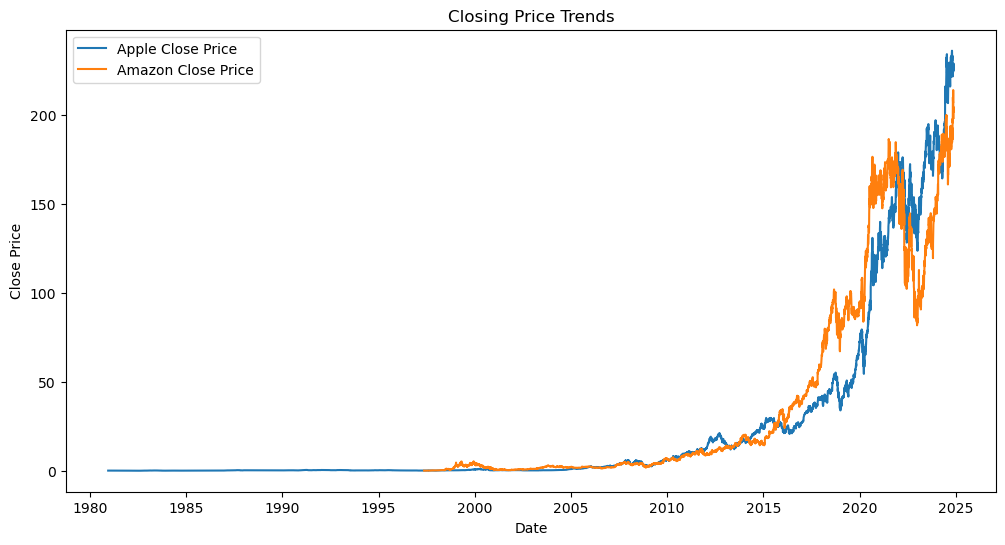

In [ ]:
# Closing price trends
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Date'], apple_data['Close'], label='Apple Close Price')
plt.plot(amazon_data['Date'], amazon_data['Close'], label='Amazon Close Price')
plt.legend()
plt.title('Closing Price Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


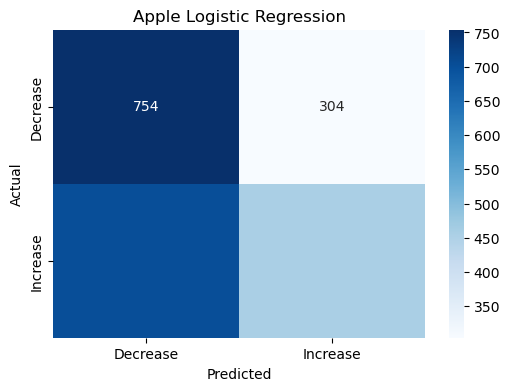

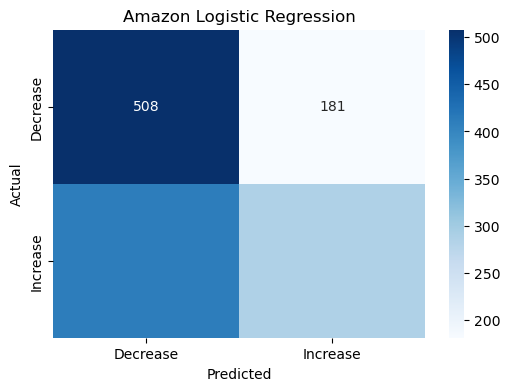

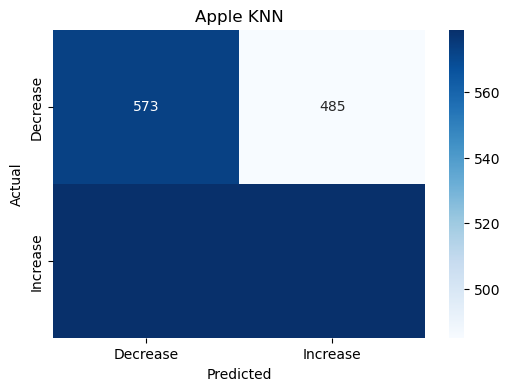

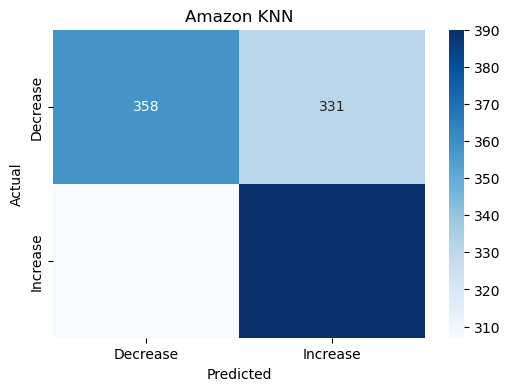

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Logistic Regression Confusion Matrices
plot_confusion_matrix(y_test_apple_clf, y_pred_log_apple, "Apple Logistic Regression")
plot_confusion_matrix(y_test_amazon_clf, y_pred_log_amazon, "Amazon Logistic Regression")

# KNN Confusion Matrices
plot_confusion_matrix(y_test_apple_clf, y_pred_knn_apple, "Apple KNN")
plot_confusion_matrix(y_test_amazon_clf, y_pred_knn_amazon, "Amazon KNN")


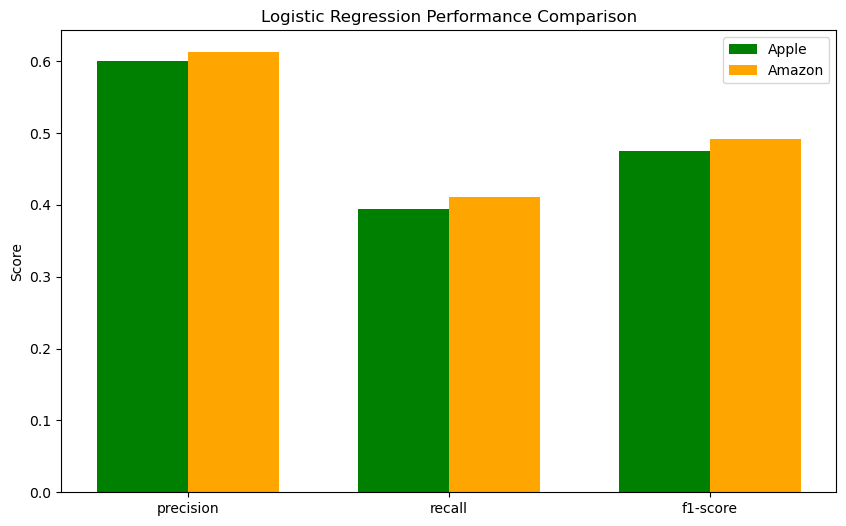

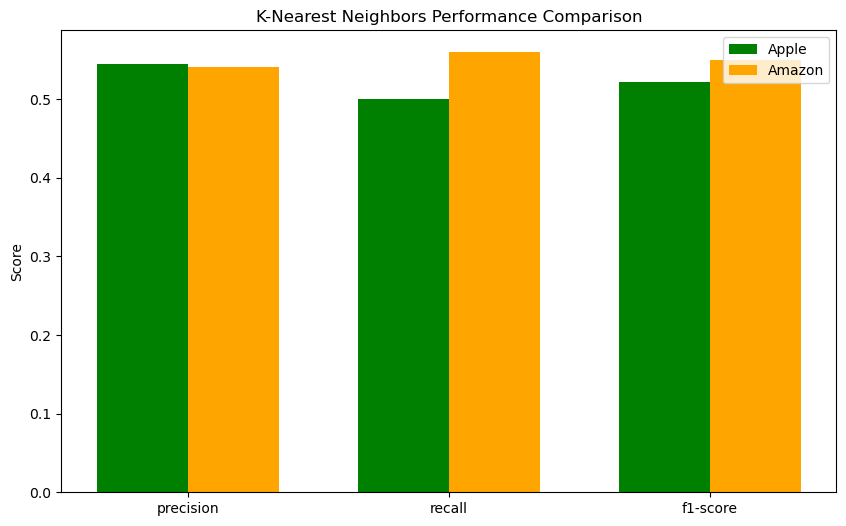

In [44]:
import numpy as np

def plot_metrics_comparison(report_apple, report_amazon, model_name):
    metrics = ['precision', 'recall', 'f1-score']
    labels = ['Apple', 'Amazon']

    apple_scores = [report_apple['1'][metric] for metric in metrics]
    amazon_scores = [report_amazon['1'][metric] for metric in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, apple_scores, width, label='Apple', color='green')
    plt.bar(x + width/2, amazon_scores, width, label='Amazon', color='orange')

    plt.xticks(x, metrics)
    plt.ylabel('Score')
    plt.title(f'{model_name} Performance Comparison')
    plt.legend()
    plt.show()

# Generate classification reports as dictionaries
report_log_apple = classification_report(y_test_apple_clf, y_pred_log_apple, output_dict=True)
report_log_amazon = classification_report(y_test_amazon_clf, y_pred_log_amazon, output_dict=True)

report_knn_apple = classification_report(y_test_apple_clf, y_pred_knn_apple, output_dict=True)
report_knn_amazon = classification_report(y_test_amazon_clf, y_pred_knn_amazon, output_dict=True)

# Plot performance comparisons
plot_metrics_comparison(report_log_apple, report_log_amazon, "Logistic Regression")
plot_metrics_comparison(report_knn_apple, report_knn_amazon, "K-Nearest Neighbors")


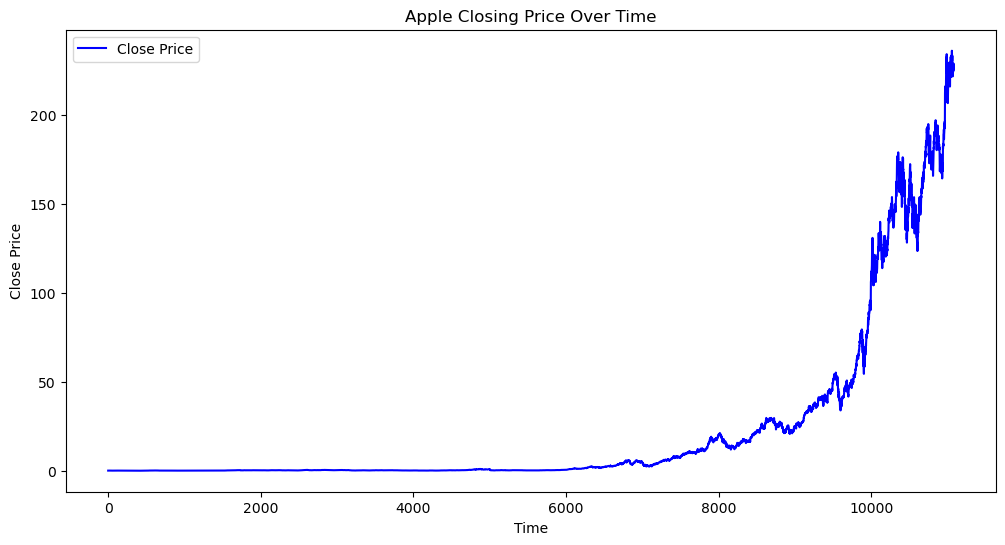

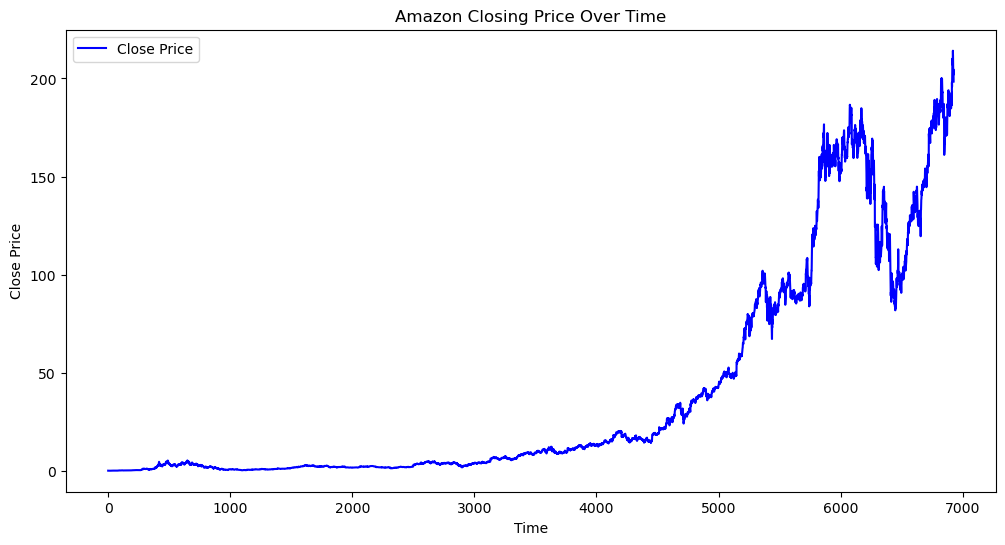

In [46]:
def plot_time_series(data, company):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{company} Closing Price Over Time')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Plot time series for Apple and Amazon
plot_time_series(apple_data, "Apple")
plot_time_series(amazon_data, "Amazon")


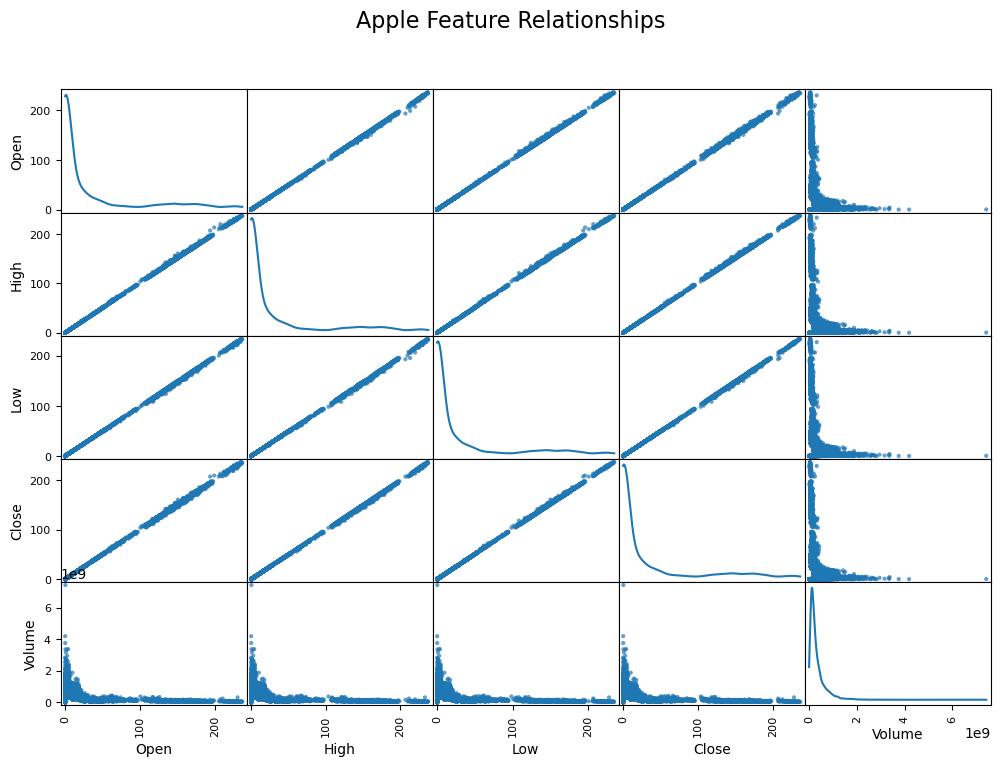

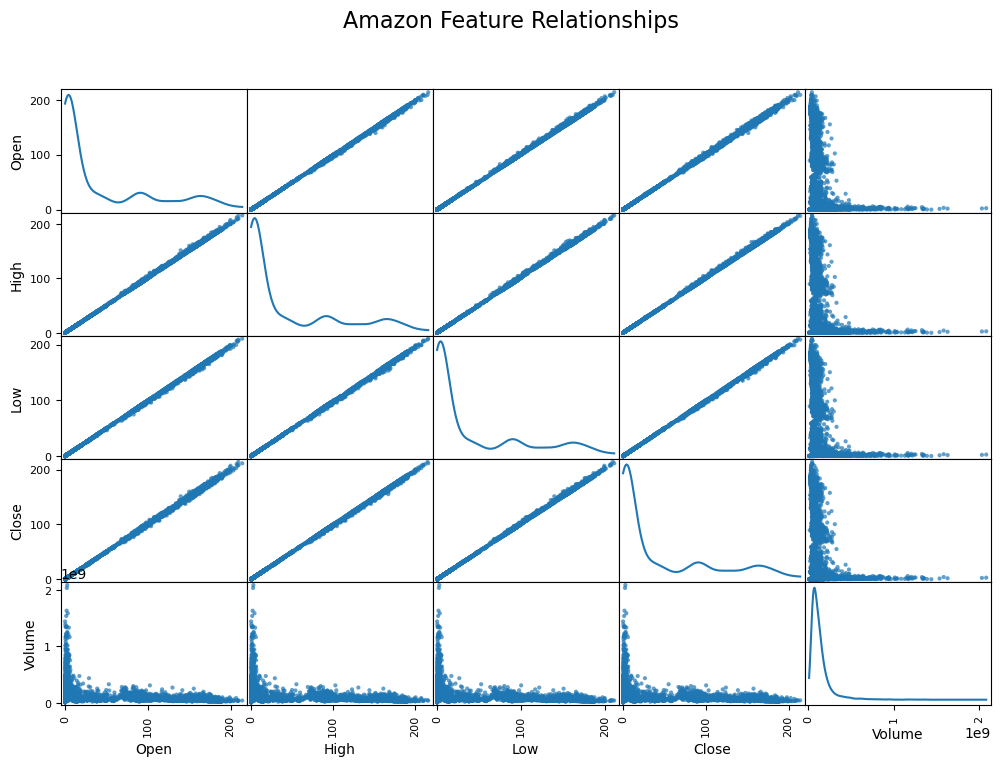

In [48]:
from pandas.plotting import scatter_matrix

def plot_scatter_matrix(data, company):
    scatter_matrix(data[['Open', 'High', 'Low', 'Close', 'Volume']], figsize=(12, 8), diagonal='kde', alpha=0.7)
    plt.suptitle(f'{company} Feature Relationships', fontsize=16)
    plt.show()

# Plot scatter matrix for Apple and Amazon
plot_scatter_matrix(apple_data, "Apple")
plot_scatter_matrix(amazon_data, "Amazon")
